In [54]:
import pandas as pd
import matplotlib.pyplot as plt
csv = pd.read_csv(f"predator_output_4.csv")

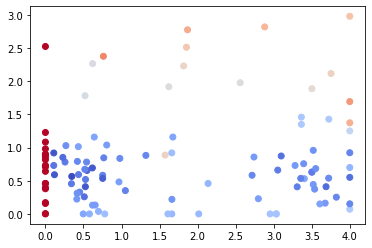

In [55]:
plt.scatter(csv['gamma1'], csv['gamma2'], c=csv['alive'],cmap='coolwarm')
plt.show()

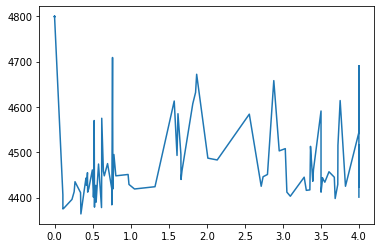

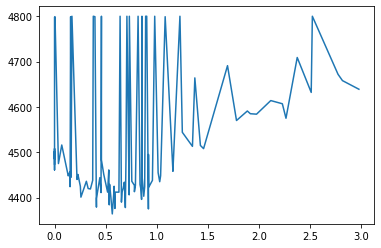

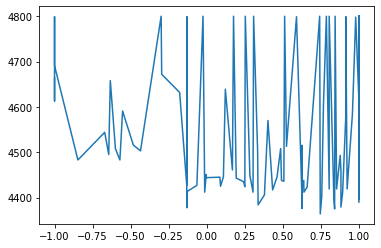

In [56]:
for val in ("gamma1","gamma2","k"):
    csv = csv.sort_values(by=val)
    plt.plot(csv[val], csv['alive'])
    plt.show()

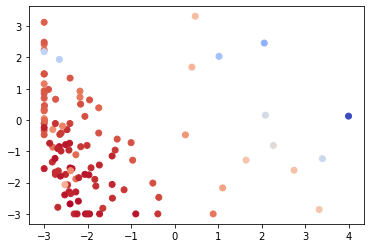

In [57]:
csv = pd.read_csv(f"prey_output_4.csv")
plt.scatter(csv['alpha'], csv['beta'], c=csv['alive'],cmap='coolwarm')
plt.show()

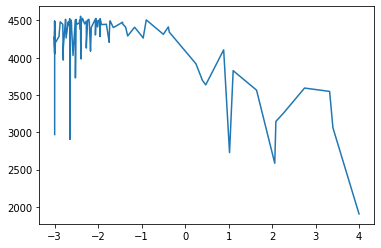

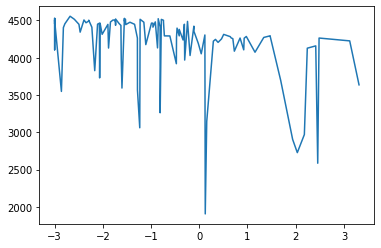

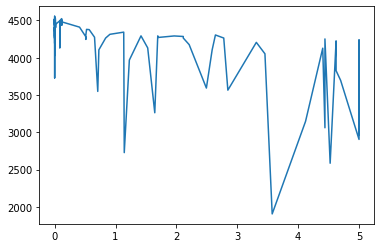

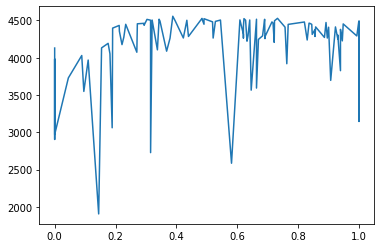

In [58]:
for val in ("alpha","beta","gamma","delta"):
    csv = csv.sort_values(by=val)
    plt.plot(csv[val], csv['alive'])
    plt.show()

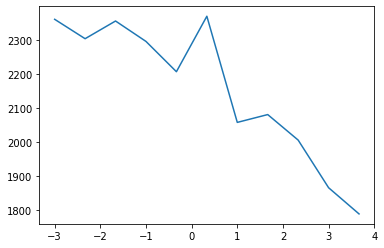

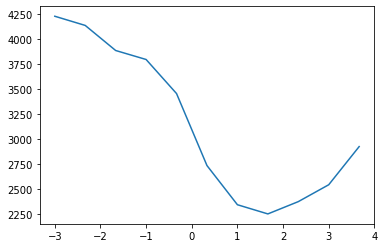

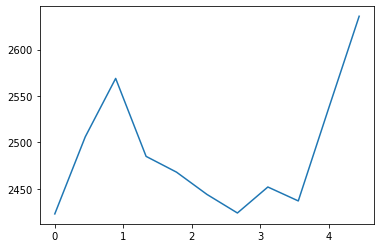

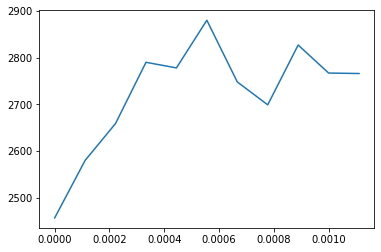

In [59]:
csv = pd.read_csv(f"test_const_prey.csv")
for i,val in enumerate(["alpha","beta","gamma","delta"]):
    temp = csv.loc[i*11:(i+1)*11-1]
    plt.plot(temp[val], temp['alive'])
    plt.show()

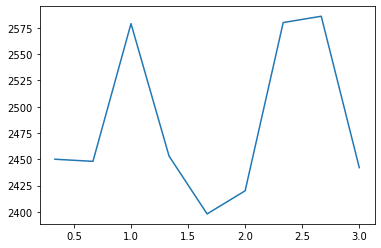

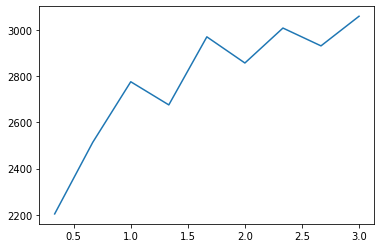

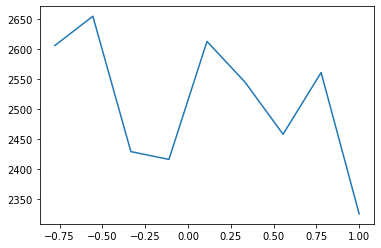

In [60]:
csv = pd.read_csv(f"test_const_predator.csv")
for i,val in enumerate(["gamma1","gamma2","k"]):
    temp = csv.loc[i*10+1:(i+1)*10-1]
    plt.plot(temp[val], temp['alive'])
    plt.show()

In [61]:
iterationCount = 5
for i in range(iterationCount):
    print(f"Prey iteration {i+1}")
    csv = pd.read_csv(f"prey_output_{i}.csv")
    top_alive = csv.sort_values(by='alive', ascending=False).head(10)
    print(top_alive[['alpha','beta','gamma','delta','alive']].describe().loc[['mean', 'std']])
    best = csv.sort_values(by='alive', ascending=False).head(1)
    print(best[['alpha','beta','gamma','delta','alive']])
    print(f"Predator iteration {i+1}")
    csv = pd.read_csv(f"predator_output_{i}.csv")
    top_alive = csv.sort_values(by='alive', ascending=True).head(10)
    print(top_alive[['gamma1','gamma2','k','alive']].describe().loc[['mean', 'std']])
    best = csv.sort_values(by='alive', ascending=True).head(1)
    print(best[['gamma1','gamma2','k','alive']])

Prey iteration 1
         alpha      beta     gamma     delta        alive
mean -2.328946 -2.617011  0.017337  0.443473  4432.300000
std   0.555170  0.311000  0.013531  0.109230    13.241769
       alpha     beta     gamma     delta  alive
105 -2.16323 -2.63303  0.017044  0.377238   4463
Predator iteration 1
        gamma1    gamma2        k        alive
mean  2.302878  0.355305  0.76406  4409.800000
std   1.587053  0.209539  0.20819    11.292082
      gamma1    gamma2    k  alive
25  0.135531  0.701564  1.0   4395
Prey iteration 2
         alpha      beta     gamma     delta        alive
mean -1.011138 -2.205885  0.445433  0.350562  4442.400000
std   1.144925  1.051186  0.954391  0.281186   107.933313
       alpha      beta    gamma     delta  alive
15  0.055962 -0.494458  1.86568  0.000001   4667
Predator iteration 2
        gamma1    gamma2         k        alive
mean  2.075986  1.154356  0.039286  4506.200000
std   0.807762  0.079758  0.422553    15.454593
      gamma1   gamma2    

In [62]:
iterationCount = 5
prey_fields = ('alpha','beta','gamma','delta')
predator_fields = ('gamma1','gamma2','k')
df = pd.DataFrame()
for i in prey_fields: df[i] = [0 for _ in range(iterationCount)]
for i in predator_fields: df[i] = [0 for _ in range(iterationCount)]
for i in range(iterationCount):
    csv = pd.read_csv(f"prey_output_{i}.csv")
    best = csv.sort_values(by='alive', ascending=False).head(1).iloc[0]
    for j in range(4):
        df.iloc[i,j] = best[j]
    csv = pd.read_csv(f"predator_output_{i}.csv")
    best = csv.sort_values(by='alive', ascending=True).head(1).iloc[0]
    for j in range(4,7):
        df.iloc[i,j] = best[j]
print(df)

      alpha      beta     gamma     delta    gamma1    gamma2         k
0 -2.163230 -2.633030  0.017044  0.377238  0.135531  0.701564  1.000000
1  0.055962 -0.494458  1.865680  0.000001  2.492680  1.091020 -0.304072
2 -3.000000 -1.450240  0.190347  0.646496  3.174760  0.646846  1.000000
3  0.035716 -1.366400  4.335370  0.000001  4.000000  1.205510 -0.542374
4 -2.404130 -2.680160  0.000000  0.388077  0.346488  0.564967  0.746063


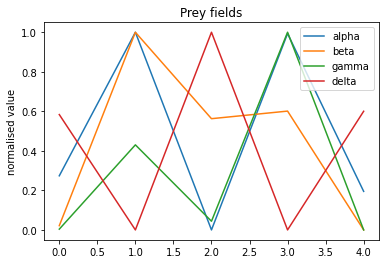

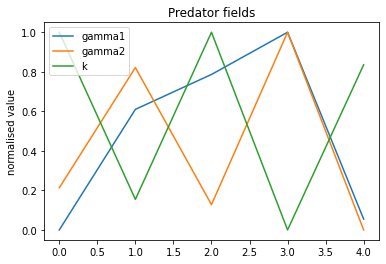

In [63]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

for col in prey_fields:
    plt.plot(normalize(df[col]), label=col)

plt.legend()
plt.ylabel("normalised value")
plt.title("Prey fields")
plt.show()

for col in predator_fields:
    plt.plot(normalize(df[col]), label=col)

plt.legend()
plt.ylabel("normalised value")
plt.title("Predator fields")
plt.show()


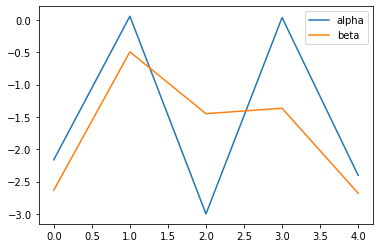

In [64]:
for col in ('alpha','beta'):
    plt.plot(df[col], label=col)

plt.legend()
plt.show()